In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
from scipy.special import comb, perm
import itertools

#### 1. From Chapter 5 of Introduction to Probability and Statistics, please do Questions 2,3,6,11,12,13, and 14

2. A communications channel transmits the digits 0 and 1. However, due to static,
the digit transmitted is incorrectly received with probability .2. Suppose that we
want to transmit an important message consisting of one binary digit. To reduce
the chance of error, we transmit 00000 instead of 0 and 11111 instead of 1. If the
receiver of the message uses “majority” decoding, what is the probability that the
message will be incorrectly decoded? What independence assumptions are you
making? (By majority decoding we mean that the message is decoded as “0” if
there are at least three zeros in the message received and as “1” otherwise.)

In [6]:
( comb(5,3) * (0.2**3) * (0.8**2) ) +  ( comb(5,4) * (0.2**4) * 0.8 ) + ( comb(5,5) * (0.2**5))

0.05792000000000003

3. If each voter is for Proposition A with probability .7, what is the probability that
exactly 7 of 10 voters are for this proposition?

In [9]:
comb(10,7) * (0.7**7) * (0.3**3)

0.2668279319999998

Let X be a binomial random variable with
E [X ] = 7
and
Var(X ) = 2.1
Find
(a) P{X = 4};
(b) P{X > 12}.

In [10]:
#a
comb(10,4) * (0.7**4) * (0.3**6)

0.03675690899999998

In [11]:
#b
0

0

11. If you buy a lottery ticket in 50 lotteries, in each of which your chance of winning
1
a prize is 100
, what is the (approximate) probability that you will win a prize (a)
at least once, (b) exactly once, and (c) at least twice?

In [41]:
#a
# 1 - P(X = 0)
[stats.poisson.pmf(mu=0.5, k=i) for i in range(1)]

[0.6065306597126334]

In [42]:
px0 = 0.606530
1 - px0

0.39347

In [43]:
#b
#P(X = 1)

px1 = 0.30300
px1

0.303

In [44]:
#c
# 1 - (P(X = 0) - P(X=1))
1 - (px0 + px1)

0.09047000000000005

12. The number of times that an individual contracts a cold in a given year is a Poisson
random variable with parameter λ = 3. Suppose a new wonder drug (based on
large quantities of vitamin C) has just been marketed that reduces the Poisson
parameter to λ = 2 for 75 percent of the population. For the other 25 percent of
the population, the drug has no appreciable effect on colds. If an individual tries
the drug for a year and has 0 colds in that time, how likely is it that the drug is
beneficial for him or her?

In [91]:
# for lambda =  3
[stats.poisson.pmf(mu=1.5, k=i) for i in range(1)]

[0.22313016014842982]

In [12]:
# for lambda = 2
[stats.poisson.pmf(mu=0.5, k=i) for i in range(1)]

[0.6065306597126334]

13. In the 1980s, an average of 121.95 workers died on the job each week. Give
estimates of the following quantities:
(a) the proportion of weeks having 130 deaths or more;
(b) the proportion of weeks having 100 deaths or less.

In [14]:
#a
#P(x) that is greater than 130
1 - 0.767

0.23299999999999998

In [15]:
#b
#p(x) less than or equal to 100
1 - 0.9765

0.023499999999999965

14. Approximately 80,000 marriages took place in the state of New York last year.
Estimate the probability that for at least one of these couples
(a) both partners were born on April 30;
(b) both partners celebrated their birthday on the same day of the year

In [29]:
# The probability of getting two people born on April 30th
same_day = (1/365)*(1/365)
print("The probability of getting two people born on April 30th: ", same_day)
lambda_var = 80000/365**2
lambda_var

The probability of getting two people born on April 30th:  7.5060987051979735e-06


0.6004878964158379

#### 2. One fun application of bionomial probabilities is in sports, where people can make predictions of playoff series' or even seasons by assessing the binomial probabilities of each matchup.

#### Say the New York Knicks get Kevin Durant next year and make it to the NBA Finals. They will face off against Lebron's Los Angeles Lakers in a seven-game series. In a given game, the Knicks chance of winning is 40%.

#### With a seven-game series, there are four ways to win. You can win in:
* 4 Games
* 5 Games (Win 4 Games and Lose 1 Game)
* 6 Games (Win 4 Games and Lose 2 Games)
* 7 Games (Win 4 Games and Lose 3 Games)

#### For each of these scenarios, the Knicks must win the last game. I.e. if they win in five games, they must win the fifth game. *Hint: Think about the odds of them winning 3 out of 4 Games, and then multiply that by the odds of them winning another game*

#### What is the probability of the Knicks winning in each of these scenarios? And what is the probability of the Knicks winning overall, given that these are the only scenarios in which they can win (*Hint: Add up the probabilities of them winning in each scenario*)

In [8]:
def printstatement():
    print("Knicks winning chances are: ")
printstatement()    
    
s = pow(0.4,4)
print("1 = ", s)
t = (pow(0.4,3) * pow(0.6,1) * comb(4,3)) * (comb(1,1) * pow(0.4,1) * pow(0.6,0))
print("2 = ", t)
u = (pow(0.4,2) * pow(0.6,2) * comb(4,2)) * (comb(1,1) * pow(0.4,1) * pow(0.6,0)) 
print("3 = ", u)
v = ((0.4) * pow(0.6,3) * comb(4,1)) * (comb(1,1) * pow(0.4,1) * pow(0.6,0))
print("4 = ", v)
print("Final probability of Knicks winning is :")
print (s+t+u+v)

Knicks winning chances are: 
1 =  0.025600000000000005
2 =  0.06144000000000002
3 =  0.13824000000000003
4 =  0.13824
Final probability of Knicks winning is :
0.36352000000000007


#### 3. Typically, the way a seven game series in the NBA happens is as such: There are two home games, then three away games, then two home games. Say, in our scenario, the two teams play the first two games in Los Angeles, the next three games in New York, and the final two games in Los Angeles.

#### For games played in Los Angeles, the Knicks have a 30% chance of winning. For games played in New York, the Knicks have a 60% chance of winning.

#### There are still four ways to win. You can win in:
* 4 Games (Two on the road, and two at home)
* 5 Games (Two on the road, and three at home)
* 6 Games (Two on the road, three at home, and one more on the road)
* 7 Games (Two on the road, three at home, and two more on the road)

#### Again, same as above, the team must win the last game in the series in each of these scenarios. This is different, however, because the odds of winning at home and the odds of winning on the road are different.

#### The best way to go about this is to probably manually write out the scenarios in which they can win. I.e.: in order to win the series in 5 games, the Knicks can win one of two of the first two away games and all three home games OR they can win both of the first two away games and two of the three home games. Add these scenarios up to get the total probability of them winning in five games.

In [11]:
s = pow(0.3,2) * pow(0.6,2)
print("Probability of winning 4 games: ", s)
t = (comb(2,1)*pow(0.6,1)*pow(0.4,1)*comb(3,3)*pow(0.3,3)*pow(0.7,0)) + (comb(2,2)*pow(0.6,2)*pow(0.4,0)*comb(3,2)*pow(0.3,2)*pow(0.7,1))
print("Probability of winning 5 games: ", t)
u = (comb(2,2)*pow(0.6,2)*pow(0.4,0)*comb(3,1)*pow(0.3,1)*pow(0.7,2) + comb(2,1)*pow(0.6,1)*pow(0.4,1)*comb(3,2)*pow(0.3,2)*pow(0.7,1) + comb(3,3)*pow(0.3,3)*pow(0.7,0)*(0.6))
print("Probability of winning 6 games", u)

Probability of winning 4 games:  0.0324
Probability of winning 5 games:  0.081
Probability of winning 6 games 0.26567999999999997


#### 4. In class we found the PMF and CDF for the result of getting two dice rolls. Find all of the results possible when you roll three dice, along with the PMF and CDF for each possibility, along with a graphical representation of each PMF and CDF (*Hint: in class we found the result for two dice by nesting one for loop inside another. How can we find the result for three dice?*). Of course label your graphs appropriately!

In [4]:
three_dice = np.array([])
for i in range(1,7):
    for j in range(1,7):
        for p in range(1,7):
            three_dice = np.append(three_dice, i + j + p)
three_dice            

array([ 3.,  4.,  5.,  6.,  7.,  8.,  4.,  5.,  6.,  7.,  8.,  9.,  5.,
        6.,  7.,  8.,  9., 10.,  6.,  7.,  8.,  9., 10., 11.,  7.,  8.,
        9., 10., 11., 12.,  8.,  9., 10., 11., 12., 13.,  4.,  5.,  6.,
        7.,  8.,  9.,  5.,  6.,  7.,  8.,  9., 10.,  6.,  7.,  8.,  9.,
       10., 11.,  7.,  8.,  9., 10., 11., 12.,  8.,  9., 10., 11., 12.,
       13.,  9., 10., 11., 12., 13., 14.,  5.,  6.,  7.,  8.,  9., 10.,
        6.,  7.,  8.,  9., 10., 11.,  7.,  8.,  9., 10., 11., 12.,  8.,
        9., 10., 11., 12., 13.,  9., 10., 11., 12., 13., 14., 10., 11.,
       12., 13., 14., 15.,  6.,  7.,  8.,  9., 10., 11.,  7.,  8.,  9.,
       10., 11., 12.,  8.,  9., 10., 11., 12., 13.,  9., 10., 11., 12.,
       13., 14., 10., 11., 12., 13., 14., 15., 11., 12., 13., 14., 15.,
       16.,  7.,  8.,  9., 10., 11., 12.,  8.,  9., 10., 11., 12., 13.,
        9., 10., 11., 12., 13., 14., 10., 11., 12., 13., 14., 15., 11.,
       12., 13., 14., 15., 16., 12., 13., 14., 15., 16., 17.,  8

In [5]:
np.unique(three_dice, return_counts=True)

(array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
        16., 17., 18.]),
 array([ 1,  3,  6, 10, 15, 21, 25, 27, 27, 25, 21, 15, 10,  6,  3,  1]))

In [9]:
three_dice_unique, count_var = np.unique(three_dice, return_counts=True)

In [10]:
three_dice_unique

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
       16., 17., 18.])

In [11]:
count_var

array([ 1,  3,  6, 10, 15, 21, 25, 27, 27, 25, 21, 15, 10,  6,  3,  1])

In [12]:
np.sum(count_var)

216

### Getting PMF

In [14]:
count_var/np.sum(count_var)

array([0.00462963, 0.01388889, 0.02777778, 0.0462963 , 0.06944444,
       0.09722222, 0.11574074, 0.125     , 0.125     , 0.11574074,
       0.09722222, 0.06944444, 0.0462963 , 0.02777778, 0.01388889,
       0.00462963])

In [15]:
np.transpose((three_dice_unique, count_var/np.sum(count_var)))

array([[3.00000000e+00, 4.62962963e-03],
       [4.00000000e+00, 1.38888889e-02],
       [5.00000000e+00, 2.77777778e-02],
       [6.00000000e+00, 4.62962963e-02],
       [7.00000000e+00, 6.94444444e-02],
       [8.00000000e+00, 9.72222222e-02],
       [9.00000000e+00, 1.15740741e-01],
       [1.00000000e+01, 1.25000000e-01],
       [1.10000000e+01, 1.25000000e-01],
       [1.20000000e+01, 1.15740741e-01],
       [1.30000000e+01, 9.72222222e-02],
       [1.40000000e+01, 6.94444444e-02],
       [1.50000000e+01, 4.62962963e-02],
       [1.60000000e+01, 2.77777778e-02],
       [1.70000000e+01, 1.38888889e-02],
       [1.80000000e+01, 4.62962963e-03]])

### Getting CDF

In [17]:
np.cumsum(count_var)/np.sum(count_var)

array([0.00462963, 0.01851852, 0.0462963 , 0.09259259, 0.16203704,
       0.25925926, 0.375     , 0.5       , 0.625     , 0.74074074,
       0.83796296, 0.90740741, 0.9537037 , 0.98148148, 0.99537037,
       1.        ])

In [18]:
np.transpose((three_dice_unique, np.cumsum(count_var)/np.sum(count_var)))

array([[3.00000000e+00, 4.62962963e-03],
       [4.00000000e+00, 1.85185185e-02],
       [5.00000000e+00, 4.62962963e-02],
       [6.00000000e+00, 9.25925926e-02],
       [7.00000000e+00, 1.62037037e-01],
       [8.00000000e+00, 2.59259259e-01],
       [9.00000000e+00, 3.75000000e-01],
       [1.00000000e+01, 5.00000000e-01],
       [1.10000000e+01, 6.25000000e-01],
       [1.20000000e+01, 7.40740741e-01],
       [1.30000000e+01, 8.37962963e-01],
       [1.40000000e+01, 9.07407407e-01],
       [1.50000000e+01, 9.53703704e-01],
       [1.60000000e+01, 9.81481481e-01],
       [1.70000000e+01, 9.95370370e-01],
       [1.80000000e+01, 1.00000000e+00]])

Text(0.5, 0.92, 'PMFs for Rolling Three Dice')

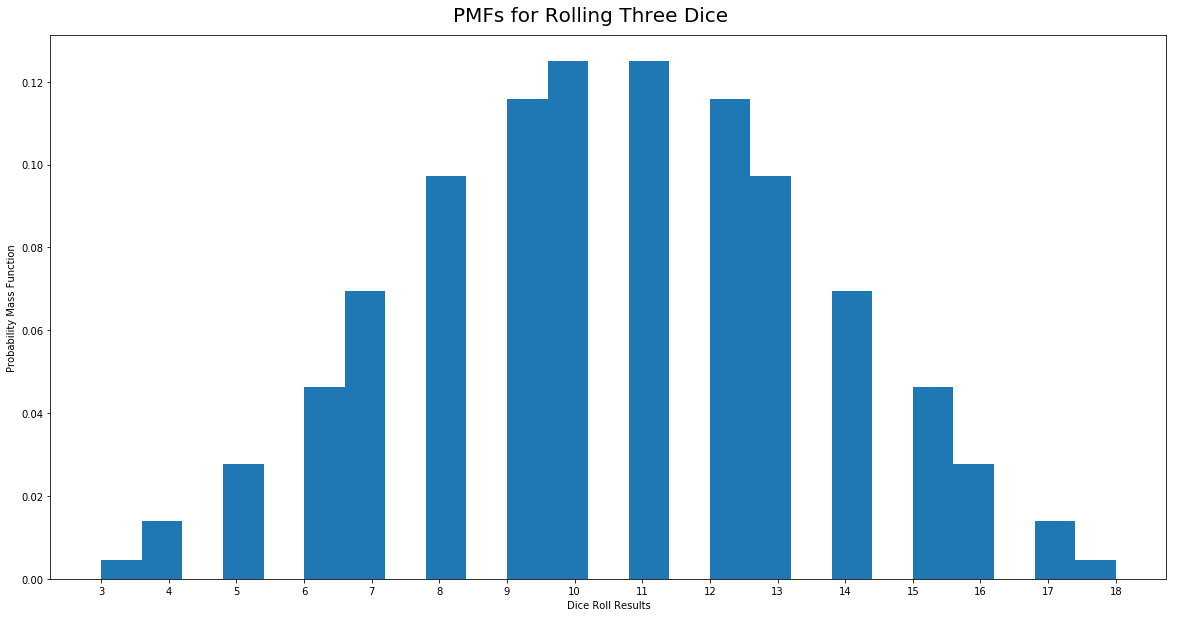

In [40]:
fig = plt.figure(figsize=(20,10))
plt.xticks(three_dice_unique)
plt.hist(three_dice_unique, weights=count_var/np.sum(count_var), bins=25)
plt.xlabel('Dice Roll Results',fontsize=10)
plt.ylabel('Probability Mass Function')
fig.suptitle('PMFs for Rolling Three Dice', fontsize=20, y=0.92)

Text(0.5, 0.92, 'CDFs for Three Dice')

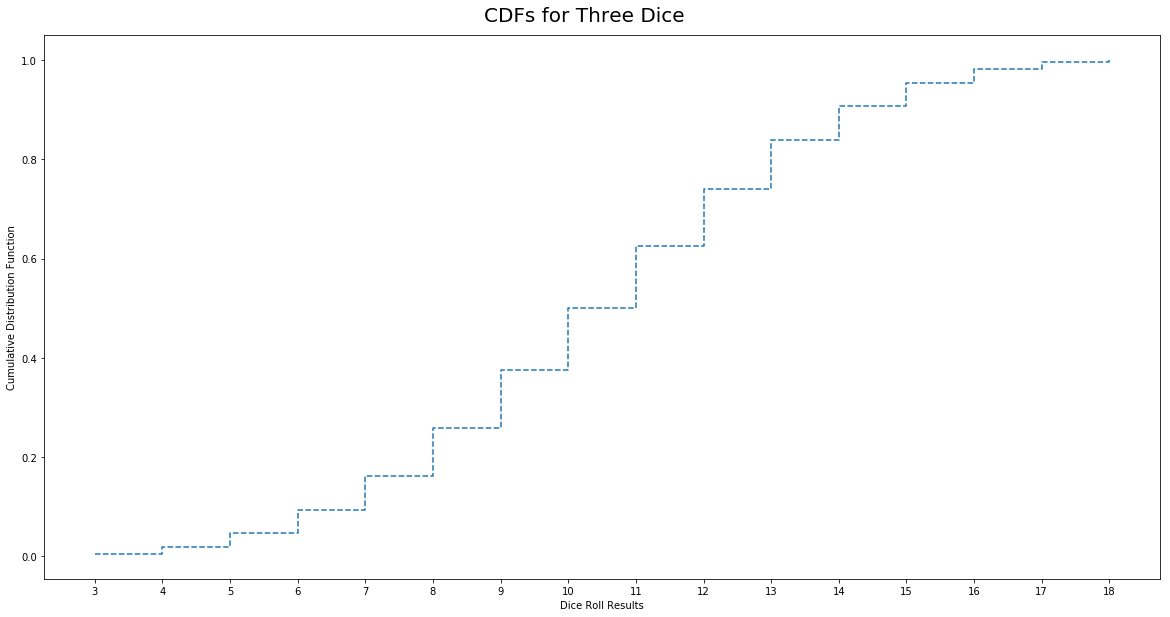

In [37]:
fig = plt.figure(figsize=(20,10))
plt.xticks(three_dice_unique)
plt.plot(three_dice_unique, np.cumsum(count_var)/np.sum(count_var),  drawstyle='steps-post', linestyle='--')
plt.xlabel('Dice Roll Results')
plt.ylabel('Cumulative Distribution Function')
fig.suptitle('CDFs for Three Dice', fontsize=20, y=0.92)